In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
n0=1
k=1.381e-23
T0=293
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19 #Used as electron charge and charge of projectile. Change with care.

In [63]:
def sigma(v):
    sigma_m=5e-20*np.sqrt(2*1.602e-19/m)/v#5e-20*(2*q/m)/v
    sigma_loss=0*1e-20*(0.5*m*v**2/q)**0.5 #U is in eV in this formula
    return sigma_m#+sigma_loss
def vm(v):
    return n0*v*sigma(v)
def dvm(v):
    return 0#n0*sigma(v)

In [64]:
def a(v):
    return q**2*E**2/(3*vm(v)*m**2) + k*T0*vm(v)/m0
def b(v):
    return (2*vm(v)+v*dvm(v))*(k*T0/(m0*v)) +m*v*vm(v)/m0 +q**2*E**2*(2/v-dvm(v)/vm(v))/(3*m**2*vm(v)) #(k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2)
def c(v):
    return (m/m0)*(3*vm(v)+v*dvm(v))

In [65]:
def F(f,g,v):
    return g
def G(f,g,v):
    return -b(v)*g/a(v)-c(v)*f/a(v)

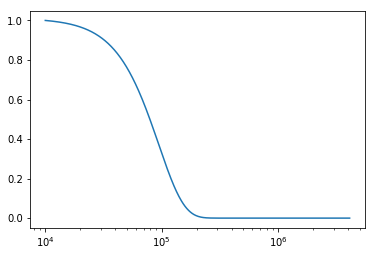

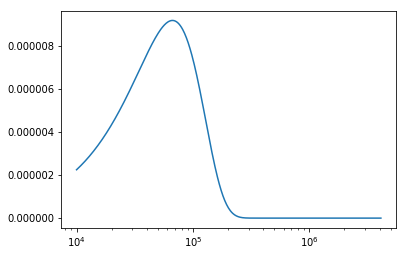

In [66]:
n=500

vmin=1e4
vmax=2*np.sqrt(24*1.602e-19/m)
v=np.logspace(np.log10(vmin),np.log10(vmax),n)
v=np.reshape(v,(n,1))

dv=v[:n-1]-v[1:]#v*((np.sqrt(24*1.602e-19/m)/1e-10)**(1/(n-1))-1)


f=np.zeros(n)
g=-np.ones(n)
for i in range(n-1,0,-1):
    k11=dv[i-1]*F(f[i],g[i],v[i])
    k21=dv[i-1]*G(f[i],g[i],v[i])
    k12=dv[i-1]*F(f[i]+0.5*k11,g[i]+0.5*k21,v[i]+0.5*dv[i-1])
    k22=dv[i-1]*G(f[i]+0.5*k11,g[i]+0.5*k21,v[i]+0.5*dv[i-1])
    k13=dv[i-1]*F(f[i]+0.5*k12,g[i]+0.5*k22,v[i]+0.5*dv[i-1])
    k23=dv[i-1]*G(f[i]+0.5*k12,g[i]+0.5*k22,v[i]+0.5*dv[i-1])
    k14=dv[i-1]*F(f[i]+k13,g[i]+k23,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);
    k24=dv[i-1]*G(f[i]+k13,g[i]+k23,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);
    f[i-1]=f[i]+(k11+2*k12+2*k13+k14)/6
    g[i-1]=g[i]+(k21+2*k22+2*k23+k24)/6
    norm=np.max(np.abs(f)) 
    f=f/norm
    g=g/norm

plt.semilogx(v,f)
plt.show()
plt.semilogx(v,np.abs(g)+1e-17)
plt.show()

(499, 1)


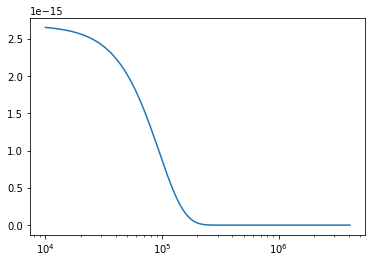

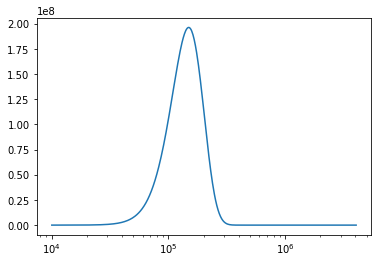

In [67]:
f=np.reshape(f[:n-1],(n-1,1))
g=np.reshape(g[:n-1],(n-1,1))
dv=np.abs(dv)
v=v[:n-1]

f0=f/np.sum(f*v**2*dv) #Normalising f0

print(np.shape(dv))
plt.semilogx(v,f0)
plt.show()

eps=np.sum(0.5*m*v**4*f0*dv)/1.602e-19
plt.semilogx(v,(v**4*f0*dv))
plt.show()

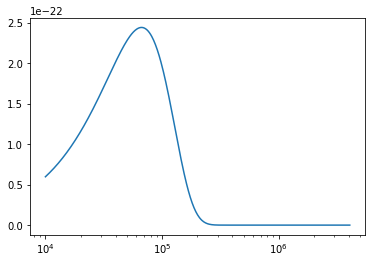

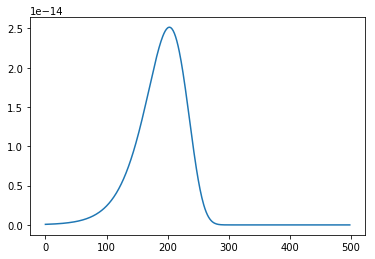

0.0379200799705 1.00087360889e-06


In [68]:
f1=-q*E*g/(m*vm(v))/np.sum(f*v**2*dv) #Normalising f1
plt.semilogx(v,f1)
plt.show()

W=np.sum(dv*f1*v**3)/3/1e4
plt.plot(dv*f1*v)
plt.show()
print(eps,W)